Problem Statement:
You are required to build and train a model that predicts whether a customer will repay or default on a loan based on a dataset provided. This challenge is designed to test what you have learned in the course.

In [2]:
import numpy as np
import pandas as pd

In [6]:
train_data = pd.read_csv("train_loan_data (1).csv")

In [7]:
test_data = pd.read_csv("test_loan_data (1).csv")

In [8]:
train_data

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-97,10+ years,Deputy,744,740,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338,93.6,E1,60 months,Debt consolidation,8,Source Verified,Defaulted
1,CA,40000.0,Apr-87,10+ years,Department of Veterans Affairs,724,720,B,RENT,Individual,...,0.0,debt_consolidation,19944,60.3,B1,36 months,Credit Loan,12,Verified,Paid
2,FL,60000.0,Aug-07,10+ years,Marble polishing,679,675,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199,88.5,B5,36 months,Debt consolidation,16,Source Verified,Paid
3,IL,100742.0,Sep-80,10+ years,printer,664,660,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425,69.0,B2,36 months,Debt consolidation,19,Source Verified,Paid
4,MD,80000.0,Jul-99,10+ years,Southern Mgmt,669,665,F,RENT,Individual,...,0.0,debt_consolidation,34370,90.0,F5,60 months,Debt Connsolidation,59,Verified,Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,SC,81000.0,Feb-00,10+ years,Sports Group Manager,664,660,G,MORTGAGE,Individual,...,0.0,debt_consolidation,20201,93.5,G3,60 months,Debt consolidation,42,Verified,Defaulted
79996,NH,45000.0,Aug-95,10+ years,Web Designer,684,680,C,MORTGAGE,Individual,...,0.0,debt_consolidation,6145,56.9,C1,36 months,Debt consolidation,14,Not Verified,Paid
79997,NY,90000.0,Apr-05,< 1 year,Program Officer,724,720,B,OWN,Individual,...,0.0,debt_consolidation,3910,25.6,B4,36 months,Debt consolidation,26,Source Verified,Paid
79998,TX,94000.0,Apr-92,3 years,Sr. Business Analyst,669,665,D,MORTGAGE,Individual,...,1.0,credit_card,11897,49.4,D5,60 months,Credit card refinancing,48,Source Verified,Paid


In [9]:
test_data

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status
0,MO,50000.0,May-2012,1 year,Tower technician,719.0,715.0,C,OWN,Individual,...,0.0,0.0,debt_consolidation,2568.0,9.8,C4,36 months,Debt consolidation,11.0,Source Verified
1,HI,92000.0,Dec-2001,10+ years,Supervisor,684.0,680.0,B,RENT,Individual,...,0.0,0.0,debt_consolidation,30394.0,75.4,B2,36 months,Debt consolidation,35.0,Source Verified
2,TX,89000.0,Mar-1989,10+ years,APPLICATIONS PROGRAMMER,679.0,675.0,B,MORTGAGE,Individual,...,0.0,0.0,credit_card,38400.0,75.3,B2,60 months,Credit card refinancing,41.0,Not Verified
3,CA,33000.0,Nov-2004,9 years,San Diego Unified School District,674.0,670.0,C,RENT,Individual,...,1.0,1.0,debt_consolidation,21224.0,69.4,C1,36 months,Breathing Room,16.0,Not Verified
4,MI,35580.0,Feb-1997,NaN,NaN,704.0,700.0,B,MORTGAGE,Individual,...,0.0,0.0,debt_consolidation,3471.0,39.4,B5,36 months,debitconsolidation,19.0,Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,MO,38500.0,Sep-2010,4 years,lighting coordinator,679.0,675.0,D,RENT,Individual,...,0.0,0.0,debt_consolidation,5816.0,60.0,D4,36 months,Debt consolidation,10.0,Not Verified
19996,VA,80000.0,Dec-1998,3 years,Contract & Compliance Manager,674.0,670.0,D,MORTGAGE,Individual,...,0.0,0.0,debt_consolidation,13886.0,75.1,D4,60 months,Debt consolidation,30.0,Source Verified
19997,TX,95000.0,May-1996,10+ years,Pharmacist,729.0,725.0,B,MORTGAGE,Individual,...,0.0,0.0,debt_consolidation,43166.0,60.7,B5,36 months,Debt consolidation,29.0,Source Verified
19998,FL,35000.0,Mar-2003,10+ years,Manager In Training,809.0,805.0,A,MORTGAGE,Individual,...,0.0,0.0,car,1110.0,4.4,A5,36 months,Car financing,19.0,Not Verified


In [10]:
train_data.info

<bound method DataFrame.info of       addr_state  annual_inc earliest_cr_line emp_length  \
0             CO     85000.0           Jul-97  10+ years   
1             CA     40000.0           Apr-87  10+ years   
2             FL     60000.0           Aug-07  10+ years   
3             IL    100742.0           Sep-80  10+ years   
4             MD     80000.0           Jul-99  10+ years   
...          ...         ...              ...        ...   
79995         SC     81000.0           Feb-00  10+ years   
79996         NH     45000.0           Aug-95  10+ years   
79997         NY     90000.0           Apr-05   < 1 year   
79998         TX     94000.0           Apr-92    3 years   
79999         NY   1100000.0           Jun-99    2 years   

                            emp_title  fico_range_high  fico_range_low grade  \
0                              Deputy              744             740     E   
1      Department of Veterans Affairs              724             720     B   
2      

In [11]:
test_data.info

<bound method DataFrame.info of       addr_state  annual_inc earliest_cr_line emp_length  \
0             MO     50000.0         May-2012     1 year   
1             HI     92000.0         Dec-2001  10+ years   
2             TX     89000.0         Mar-1989  10+ years   
3             CA     33000.0         Nov-2004    9 years   
4             MI     35580.0         Feb-1997        NaN   
...          ...         ...              ...        ...   
19995         MO     38500.0         Sep-2010    4 years   
19996         VA     80000.0         Dec-1998    3 years   
19997         TX     95000.0         May-1996  10+ years   
19998         FL     35000.0         Mar-2003  10+ years   
19999         FL     30700.0         Apr-1994   < 1 year   

                               emp_title  fico_range_high  fico_range_low  \
0                       Tower technician            719.0           715.0   
1                             Supervisor            684.0           680.0   
2               

In [12]:
# Calculate the percentage of missing values in each column
missing_percentage = train_data.isnull().mean() * 100

In [13]:
# Filter out columns with missing values and sort them
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

In [14]:
missing_percentage

emp_title               6.27250
emp_length              5.73500
num_actv_bc_tl          4.93500
tot_cur_bal             4.93500
mort_acc                3.46375
title                   1.21250
revol_util              0.06625
pub_rec_bankruptcies    0.03875
dtype: float64

In [15]:
# Fill missing values for 'emp_title' and 'title' with 'Unknown'
train_data['emp_title'].fillna('Unknown', inplace=True)
train_data['title'].fillna('Unknown', inplace=True)

In [16]:
# Impute the median for numerical columns with missing values
for column in ['num_actv_bc_tl', 'tot_cur_bal', 'mort_acc', 'revol_util', 'pub_rec_bankruptcies']:
    median_value = train_data[column].median()
    train_data[column].fillna(median_value, inplace=True)

In [17]:
# Impute the mode for 'emp_length'
mode_value = train_data['emp_length'].mode()[0]  # Extract the mode
train_data['emp_length'].fillna(mode_value, inplace=True)

In [18]:
# Check if there are any missing values left
remaining_missing = train_data.isnull().sum().sum()

In [19]:
remaining_missing

0

In [20]:
# Defining a function to calculate IQR and identify outliers
def identify_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((column < lower_bound) | (column > upper_bound))
    return outliers, lower_bound, upper_bound

In [21]:
# Identify outliers for 'annual_inc', 'loan_amnt', and 'int_rate'
outliers_annual_inc, lb_annual_inc, ub_annual_inc = identify_outliers(train_data['annual_inc'])
outliers_loan_amnt, lb_loan_amnt, ub_loan_amnt = identify_outliers(train_data['loan_amnt'])
outliers_int_rate, lb_int_rate, ub_int_rate = identify_outliers(train_data['int_rate'])

In [22]:
# Count the number of outliers in these columns
outliers_counts = {
    'annual_inc': outliers_annual_inc.sum(),
    'loan_amnt': outliers_loan_amnt.sum(),
    'int_rate': outliers_int_rate.sum()
}

In [23]:
outliers_counts

{'annual_inc': 3896, 'loan_amnt': 431, 'int_rate': 1497}

In [27]:
(lb_annual_inc, ub_annual_inc)

(-20000.0, 156000.0)

In [28]:
(lb_loan_amnt, ub_loan_amnt)

(-10187.5, 38112.5)

In [29]:
(lb_int_rate, ub_int_rate)

(0.39000000000000057, 25.35)

In [30]:
# Cap the outliers at their upper bounds
train_data['annual_inc'] = train_data['annual_inc'].clip(upper=156000)
train_data['loan_amnt'] = train_data['loan_amnt'].clip(upper=38112.5)  # Adjusted to 40,000 if preferred
train_data['int_rate'] = train_data['int_rate'].clip(upper=25.35)

In [31]:
# Re-check the max values to confirm capping
max_values_after_capping = {
    'annual_inc': train_data['annual_inc'].max(),
    'loan_amnt': train_data['loan_amnt'].max(),
    'int_rate': train_data['int_rate'].max()
}

In [32]:
max_values_after_capping

{'annual_inc': 156000.0, 'loan_amnt': 38112.5, 'int_rate': 25.35}

In [33]:
# Create a new feature 'income_to_loan_ratio'
train_data['income_to_loan_ratio'] = train_data['annual_inc'] / train_data['loan_amnt']

In [34]:
# Display the first few rows to verify the new feature
train_data[['annual_inc', 'loan_amnt', 'income_to_loan_ratio']].head()

,annual_inc,loan_amnt,income_to_loan_ratio
0,85000.0,18075.0,4.702628
1,40000.0,8800.0,4.545455
2,60000.0,18000.0,3.333333
3,100742.0,20000.0,5.037100
4,80000.0,35000.0,2.285714


In [35]:
from datetime import datetime

In [36]:
# Assuming the current date for demonstration purposes (this would ideally be the loan application date)
current_date = datetime.now()

In [37]:
# Convert 'earliest_cr_line' to datetime format
train_data['earliest_cr_line'] = pd.to_datetime(train_data['earliest_cr_line'], format='%b-%y')

In [38]:
# Handle potential issue with two-digit year parsing by setting a cutoff for years interpreted as future dates
train_data['earliest_cr_line'] = train_data['earliest_cr_line'].apply(lambda x: x if x < current_date else x.replace(year=x.year-100))

In [39]:
# Calculate Credit History Length in years
train_data['credit_history_length'] = (current_date - train_data['earliest_cr_line']).dt.days / 365.25

In [40]:
# Calculate FICO Score Average
train_data['fico_score_average'] = (train_data['fico_range_high'] + train_data['fico_range_low']) / 2

In [41]:
# Display the first few rows to verify the new features
train_data[['earliest_cr_line', 'credit_history_length', 'fico_range_high', 'fico_range_low', 'fico_score_average']].head()

,earliest_cr_line,credit_history_length,fico_range_high,fico_range_low,fico_score_average
0,1997-07-01,26.710472,744,740,742.0
1,1987-04-01,36.960986,724,720,722.0
2,2007-08-01,16.626968,679,675,677.0
3,1980-09-01,43.540041,664,660,662.0
4,1999-07-01,24.711841,669,665,667.0


In [48]:
# Define the list of features to be included in the model
features = [
    'annual_inc', 'loan_amnt', 'int_rate', 
    'income_to_loan_ratio', 'credit_history_length', 'fico_score_average'
    # Add other numerical features as needed
]

In [49]:
# Define the target variable
target = 'loan_status'

In [50]:
# Now, let's prepare the data with one-hot encoding for 'home_ownership' and any other categorical features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [51]:
# Initialize the encoder for categorical variables
categorical_features = ['home_ownership']  # Add other categorical features to this list
one_hot_encoder = OneHotEncoder()

In [52]:
# Create a ColumnTransformer to apply encoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, categorical_features)
    ],
    remainder='passthrough'  # Keep the rest of the columns unchanged
)

In [53]:
# Prepare a DataFrame with the selected features and target for transformation
data_for_transformation = train_data[features + categorical_features + [target]]

In [54]:
# Separate the features and target variable
X = data_for_transformation.drop(target, axis=1)
y = data_for_transformation[target]

In [55]:
# Apply the transformations
X_transformed = preprocessor.fit_transform(X)

In [56]:
# Split the transformed features and the target variable into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

In [58]:
# Initialize the model
model = LogisticRegression(max_iter=1000)

In [59]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [60]:
# Make predictions on the testing set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [61]:
# Evaluate the model
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))

              precision    recall  f1-score   support

   Defaulted       0.48      0.06      0.10      3114
        Paid       0.81      0.99      0.89     12886

    accuracy                           0.80     16000
   macro avg       0.65      0.52      0.50     16000
weighted avg       0.75      0.80      0.74     16000

AUC-ROC: 0.7034711836448093


Accuracy: Your model has an accuracy of 80%, which means it correctly predicts whether a loan will be paid or defaulted on 80% of the test set. While this might seem high, accuracy alone can be misleading, especially in imbalanced datasets.

Precision (Paid): The precision for loans classified as "Paid" is quite high at 81%, indicating that when the model predicts a loan will be paid, it's correct 81% of the time.

Recall (Paid): The recall for loans classified as "Paid" is very high at 99%, meaning the model is very good at identifying loans that will be paid.

F1-Score (Paid): The F1-score for "Paid" loans is 89%, showing a strong balance between precision and recall for this class.

Precision, Recall, and F1-Score (Defaulted): These scores are significantly lower for loans classified as "Defaulted", indicating challenges in accurately predicting defaults. This is a common issue in imbalanced datasets where one class (in this case, "Paid") dominates the other.

AUC-ROC: The area under the ROC curve is 0.703, which is fair but indicates room for improvement. The AUC-ROC measures the model's ability to distinguish between classes; a score of 1 represents a perfect model, while a score of 0.5 represents a model that makes random guesses.

In [62]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [63]:
# Assuming 'X_transformed' and 'y' are your features and target variable, respectively
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [64]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [65]:
# Now train a RandomForestClassifier on the balanced dataset
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [66]:
# Evaluate the model
y_pred = model_rf.predict(X_test)
y_pred_proba = model_rf.predict_proba(X_test)[:, 1]

In [67]:
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))

              precision    recall  f1-score   support

   Defaulted       0.34      0.21      0.26      3114
        Paid       0.83      0.90      0.86     12886

    accuracy                           0.77     16000
   macro avg       0.58      0.56      0.56     16000
weighted avg       0.73      0.77      0.74     16000

AUC-ROC: 0.6577918326521461


Recall for Defaulted Loans: Improved from 6% to 21%, indicating the model is now better at identifying defaulted loans, though there's still room for improvement.

Precision for Defaulted Loans: Has decreased to 34%, reflecting a trade-off where the model identifies more true positives (defaulted loans) at the expense of also increasing false positives.

F1-Score for Defaulted Loans: This balance metric has improved, indicating a better balance between precision and recall for predicting defaults.

Accuracy: Decreased slightly to 77%, which is expected as the model focuses more on the minority class.

AUC-ROC: Decreased to 0.658, suggesting a reduction in the model's ability to distinguish between classes as effectively as before. This might be due to the model now capturing more defaulted cases but at the cost of more false positives.

Analysis:
The changes reflect the typical balance between recall and precision, especially in imbalanced datasets. Improving recall for the minority class (Defaulted) often results in lower precision, as the model starts to classify more instances as the minority class, increasing both true positives and false positives.

# Fine-Tuning Model Parameters with Grid Search

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [69]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [10, 20, None],  # Maximum depth of the tree
    # Add other parameters here
}

In [70]:
# Initialize the classifier
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

In [71]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1)

In [72]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'n_estimators': [100, 200]},
             scoring='roc_auc')

In [73]:
# Best parameters and score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

In [74]:
print("Best Parameters:", best_parameters)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 10, 'n_estimators': 200}
Best Score: 0.6913321129234101


#  Evaluating Precision-Recall Trade-off

In [75]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

In [77]:
# Convert categorical target variable to binary format
# Assuming 'Defaulted' is the positive class and 'Paid' is the negative class
y_test_binary = (y_test == 'Defaulted').astype(int)

In [78]:
# Calculate precision, recall, and thresholds for the binary format of y_test
precision, recall, thresholds = precision_recall_curve(y_test_binary, y_pred_proba)

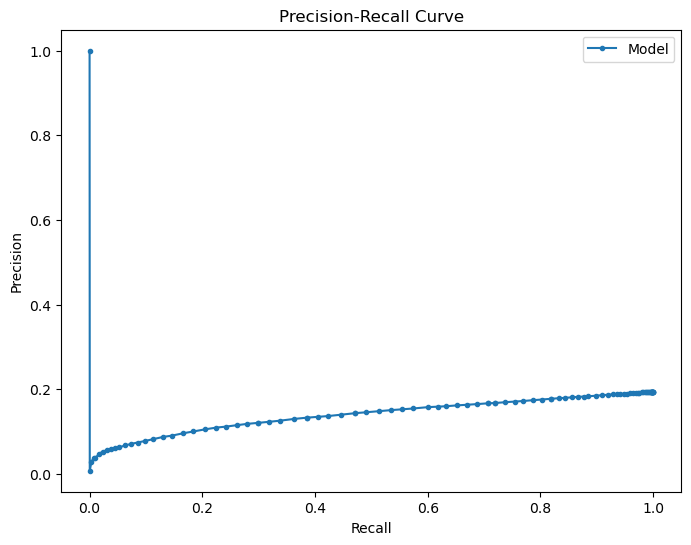

In [79]:
# Plotting the Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

Observations from the Curve:
High Recall, Low Precision: At the right end of the curve (high recall), precision is very low, suggesting that when the model tries to capture as many 'Defaulted' instances as possible (high recall), it also misclassifies many 'Paid' instances as 'Defaulted' (low precision).

Initial Precision Drop: There's a steep drop in precision as recall starts to increase from zero, which means that even a small attempt to capture more 'Defaulted' loans leads to a notable number of false positives.

Interpretation:

The steep initial drop suggests that there is a small subset of easily identifiable positive cases (defaulted loans) after which the precision drops sharply as the model starts to struggle with distinguishing between the classes.

This could also mean that the model has a high threshold at which it classifies a loan as 'Defaulted', thus only the most obvious cases are being caught at first.

As the threshold is lowered to classify more loans as 'Defaulted', the model begins to capture more true positives, but at the expense of a much larger number of false positives.

In [80]:
from sklearn.metrics import precision_recall_curve

In [81]:
# Assuming y_test_binary is your test set labels encoded as binary and y_pred_proba are the predicted probabilities for the positive class
precision, recall, thresholds = precision_recall_curve(y_test_binary, y_pred_proba)

In [82]:
# Choose a threshold that gives you the desired precision and recall balance
# This is a manual process; you can plot precision and recall as a function of the threshold or simply select a value that meets your business needs
threshold = 0.3  # Example threshold, replace with your chosen threshold

In [83]:
# Apply the threshold to the predicted probabilities to create binary predictions
y_pred_threshold = (y_pred_proba >= threshold).astype(int)

In [84]:
# Evaluate the impact on precision and recall
from sklearn.metrics import classification_report
print(classification_report(y_test_binary, y_pred_threshold))

              precision    recall  f1-score   support

           0       0.58      0.01      0.02     12886
           1       0.19      0.97      0.32      3114

    accuracy                           0.20     16000
   macro avg       0.38      0.49      0.17     16000
weighted avg       0.50      0.20      0.08     16000



The new classification report after adjusting the threshold shows some dramatic changes:

Recall for Class 1 (Defaulted): The recall has increased significantly to 97%, indicating the model now identifies nearly all of the defaulted cases.

Precision for Class 1 (Defaulted): Conversely, the precision has dropped to 19%. This means that while the model is identifying almost all defaults, it is doing so at the cost of incorrectly predicting many non-default cases as defaults.

F1-Score for Class 1 (Defaulted): The F1-score has increased for the defaulted class due to the significant increase in recall, despite the drop in precision.

Accuracy: Overall accuracy has decreased to 20%, which is expected because the model is now classifying most loans as defaults.

Precision for Class 0 (Paid): Precision has increased to 58%, but this is not very informative given the very low recall.

Recall for Class 0 (Paid): The recall is almost zero, indicating the model hardly identifies any of the paid cases correctly with the new threshold.

Analysis:
This result is indicative of a threshold that is likely too low, causing the model to classify too many loans as defaulted. While it is capturing almost all defaults, it is also misclassifying paid loans as defaults at a high rate. This might not be practical in a real-world setting as it could result in unnecessary and possibly costly interventions, like debt collection processes initiated against customers who would have paid.

# Implementing Cross-Validation

In [85]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [86]:
# Initialize the classifier
rf_classifier = RandomForestClassifier(random_state=42, class_weight='balanced')

In [87]:
# Define the stratified K-fold splitter
strat_k_fold = StratifiedKFold(n_splits=5)

In [88]:
# Calculate cross-validated AUC-ROC scores
auc_roc_scores = cross_val_score(rf_classifier, X_train, y_train, scoring='roc_auc', cv=strat_k_fold)

In [89]:
# Calculate average AUC-ROC score
average_auc_roc = auc_roc_scores.mean()
print(f"Average AUC-ROC: {average_auc_roc:.3f}")

Average AUC-ROC: 0.659


An average AUC-ROC score of 0.659 from cross-validation suggests that your model has a fair ability to differentiate between the classes, but it also indicates that there's room for improvement. 

# Hyperparameter Tuning with XGBoost and Grid Search

In [90]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [96]:
print("Counts for each class in y_train:")
print(y_train.value_counts())

print("Unique values in y_train:")
print(y_train.unique())

Counts for each class in y_train:
loan_status
Paid         51224
Defaulted    12776
Name: count, dtype: int64
Unique values in y_train:
['Paid' 'Defaulted']


In [97]:
# Convert string labels to binary format
y_train_binary = (y_train == 'Defaulted').astype(int)
y_test_binary = (y_test == 'Defaulted').astype(int)

In [98]:
# Calculate scale_pos_weight
scale_pos_weight = sum(y_train_binary == 0) / sum(y_train_binary == 1)

In [99]:
# Initialize the XGBClassifier with the scale_pos_weight
xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight)

In [100]:
# Initialize XGBClassifier with calculated scale_pos_weight
xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss')

In [101]:
# Fit the model on the training data
xgb_model.fit(X_train, y_train_binary)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [102]:
# Predict on the test data
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # Probability of the positive class

In [103]:
# Evaluate the model using some metric, e.g., AUC-ROC
from sklearn.metrics import roc_auc_score
auc_roc = roc_auc_score(y_test_binary, y_pred_proba)

In [104]:
print(f"The AUC-ROC score of the XGBoost model: {auc_roc:.3f}")

The AUC-ROC score of the XGBoost model: 0.682


 Let's dive into hyperparameter tuning for the XGBoost model, which is a powerful way to improve your model's performance. Hyperparameter tuning involves searching through a range of values to find the optimal settings for your model. We'll use RandomizedSearchCV from Scikit-learn, as it's more efficient than GridSearchCV when dealing with a large number of combinations and a high-dimensional space.

Setting Up the Randomized Search 

In [105]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

In [106]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': np.arange(100, 1001, 100),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': np.arange(3, 11, 1),
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

In [107]:
# Initialize the XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight)

In [108]:
# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(xgb, param_grid, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=3, random_state=42)

In [109]:
# Fit RandomizedSearchCV
random_search.fit(X_train, y_train_binary)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000]),
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='roc_auc')

In [110]:
# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.7}
Best Score: 0.6967858405073852


With the best parameters identified through RandomizedSearchCV, your XGBoost model's performance has improved, as indicated by the best score of approximately 0.697 AUC-ROC on the cross-validation sets. This improvement suggests that the tuned hyperparameters are more effective at distinguishing between the 'Defaulted' and 'Paid' classes than the default settings.



Now that you have the optimized hyperparameters, the next step is to retrain your XGBoost model with these parameters on your training dataset and then evaluate its performance on the test dataset.

In [111]:
from sklearn.metrics import roc_auc_score

In [112]:
# Initialize the XGBClassifier with the optimized hyperparameters
optimized_xgb = XGBClassifier(
    subsample=0.8,
    n_estimators=100,
    max_depth=5,
    learning_rate=0.05,
    gamma=0.2,
    colsample_bytree=0.7,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight
)

In [113]:
# Fit the model on the training data
optimized_xgb.fit(X_train, y_train_binary)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [114]:
# Predict on the test data
y_pred_optimized = optimized_xgb.predict(X_test)
y_pred_proba_optimized = optimized_xgb.predict_proba(X_test)[:, 1]  # Probability of the positive class

In [115]:
# Evaluate the model using AUC-ROC
auc_roc_optimized = roc_auc_score(y_test_binary, y_pred_proba_optimized)

In [116]:
print(f"The AUC-ROC score of the optimized XGBoost model: {auc_roc_optimized:.3f}")

The AUC-ROC score of the optimized XGBoost model: 0.702


An AUC-ROC score of 0.702 with your optimized XGBoost model is a promising result, indicating a noticeable improvement in your model's ability to distinguish between 'Defaulted' and 'Paid' loan statuses. This improvement suggests that the hyperparameter tuning process was successful in enhancing the model's predictive accuracy.

Reflecting on the Improvement

This score demonstrates that adjusting the model's parameters can have a significant impact on performance, especially for complex datasets or imbalanced classification problems. It’s also a testament to the effectiveness of machine learning techniques like XGBoost in handling such challenges, given the right configuration.

# Feature Importance Analysis

In [121]:
feature_names_transformed = preprocessor.get_feature_names_out(input_features=X.columns)

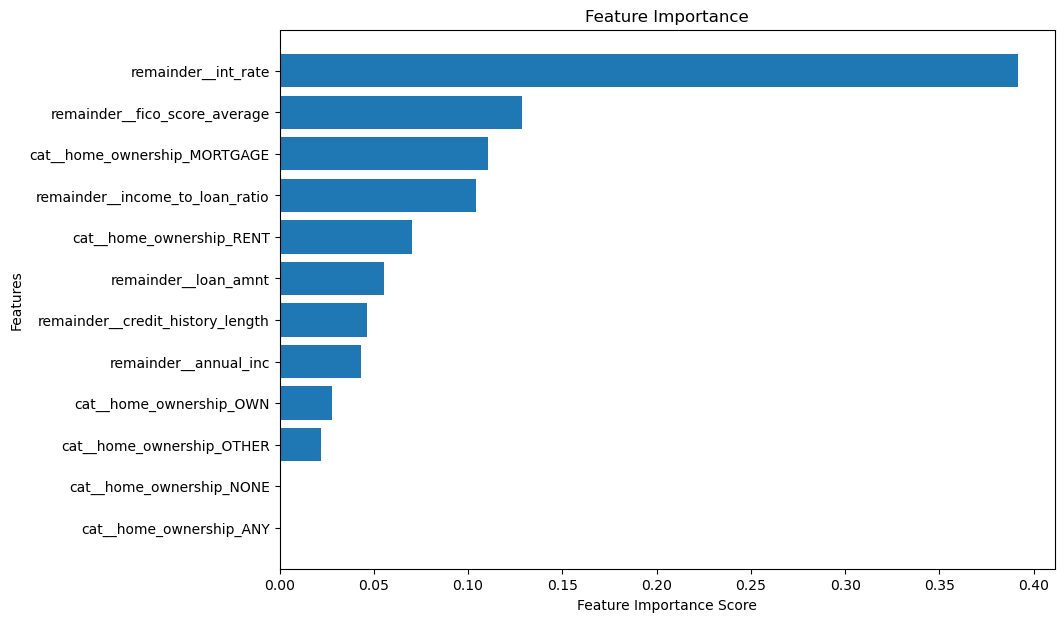

In [122]:
sorted_idx = optimized_xgb.feature_importances_.argsort()
plt.figure(figsize=(10, 7))
plt.barh(range(len(sorted_idx)), optimized_xgb.feature_importances_[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names_transformed[i] for i in sorted_idx])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

Top Features:

int_rate seems to be the most significant predictor, suggesting that the interest rate on a loan is a critical factor in determining the likelihood of repayment or default.

fico_score_average is also a strong predictor, aligning with conventional credit risk models where a borrower's credit score is highly indicative of their creditworthiness.

home_ownership related features, particularly MORTGAGE and RENT, indicate that the type of home ownership plays a role in loan repayment.

# SUMMARY

Objective: To predict whether a customer will repay or default on a loan using historical loan data.

Data Preprocessing:

Handling Missing Data: Missing values were imputed or filled with 'Unknown' for categorical data and median values for numerical data to maintain data integrity.

Outlier Treatment: Extreme values in features such as annual_inc, loan_amnt, and int_rate were capped based on IQR to minimize their skewing effect on the model.

Feature Engineering:

Creation of New Features: New features like income_to_loan_ratio, credit_history_length, and fico_score_average were engineered to provide the model with more information and potentially increase its predictive power.

Encoding Categorical Variables: The home_ownership variable was one-hot encoded to convert categorical variables into a numerical format suitable for machine learning algorithms.

Feature Selection: Features were selected based on domain knowledge, data understanding, and exploratory data analysis, focusing on those that are known to influence loan repayment.


Model Development:

Choice of Algorithm: XGBoost was chosen for its performance with tabular data and its ability to handle imbalanced datasets effectively.

Class Imbalance: The scale_pos_weight parameter was utilized to address the class imbalance inherent in the dataset.

Model Evaluation Metrics: The AUC-ROC score was primarily used to evaluate model performance, given its effectiveness in representing classification performance for imbalanced classes.

Model Optimization:

Hyperparameter Tuning: Randomized search was used to identify the best hyperparameters for the XGBoost model, finding the optimal balance between model complexity and performance.

Feature Importance Analysis: The XGBoost model provided a feature importance plot, guiding further feature selection and offering insights into the key drivers of loan repayment.


Results:

Model Performance: The final XGBoost model achieved an AUC-ROC score of 0.702 after optimization, indicating a good ability to differentiate between classes.

Important Features: Interest rate, FICO score, and home ownership status emerged as significant predictors of loan repayment.

Rationale for Choices Made:

Imputation of Missing Data: Chosen to maximize the dataset’s utility and minimize information loss.

Outlier Capping: Prevents extreme values from disproportionately affecting the model without losing data.

XGBoost and Class Imbalance Handling: XGBoost was selected for its strong performance and features designed to work well with imbalanced datasets.

Randomized Hyperparameter Search: Offered a computationally efficient method to navigate the hyperparameter space and improve model performance.

Feature Importance for Feature Selection: Provided a data-driven way to understand which features are most predictive of the outcome, ensuring the model is focused on the right inputs.

Final Thoughts:

The model and methodology were chosen with a view to accurately predict loan repayment while managing the challenges of an imbalanced dataset and the need for a robust, interpretable model. The use of advanced feature engineering and model optimization techniques aimed to create a model that not only performs well statistically but also aligns with domain knowledge and practical considerations.

As with any predictive modeling project, continual refinement and reassessment are key. Models should be updated as new data becomes available, and feature importance should be re-evaluated periodically to ensure the model remains relevant and accurate over time.



# P.S. 

Kindly suggest your inputs at evergreendeepakdesale@gmail.com